In [ ]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [60]:
df_test = pd.read_excel('data/data_w_origin/GHOMOYAT.xlsx')
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,"<nobr dir=""ltr"">1380/01/19</nobr>",0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,"<nobr dir=""ltr"">1380/08/03</nobr>",0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,"<nobr dir=""ltr"">1380/01/01</nobr>",0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,"<nobr dir=""ltr"">1379/08/05</nobr>",0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,"<nobr dir=""ltr"">1381/05/06</nobr>",0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [61]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df_test['Sen']=df_test['Sen'].apply(lambda cw : remove_tags(cw))
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,1380/01/19,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,1380/08/03,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,1380/01/01,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,1379/08/05,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,1381/05/06,0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [62]:
test = '1380/01/19'
day, month, year = test.split("/")
year

'19'

In [63]:
def age_calc(string):
    year, month, day = string.split("/")
    year = 1401 - int(year)
    return year

df_test['Sen']=df_test['Sen'].apply(lambda cw : age_calc(cw))
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,21,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,22,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,20,0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [64]:
cols = ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP']
df_test.columns = cols
df_test.columns
df_test = df_test.loc[~(df_test == 999).any(axis=1)]

1    8776
2    1287
5    1212
3    1175
4     940
Name: Mantagheh, dtype: int64


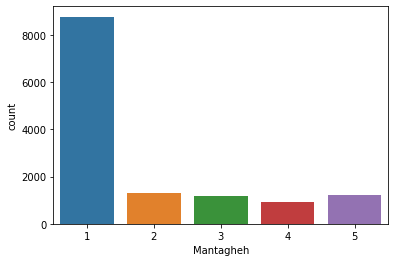

In [65]:
sns.countplot(x='Mantagheh', data=df_test)
print(df_test['Mantagheh'].value_counts())

1    8465
2    1972
6     831
4     809
3     780
5     533
Name: GDP, dtype: int64


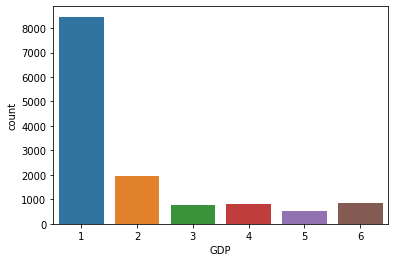

In [66]:
sns.countplot(x='GDP', data=df_test)
print(df_test['GDP'].value_counts())

In [4]:
# create a dictionary to map unique values to numbers
mapping_dict = {}
variables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})
for col in variables:
    unique_values = df_test[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df_test.replace(mapping_dict, inplace=True)
df_test.head()

,جنس,مقطع,دوره,معدل كل,فرصت مطالعاتی بین المللی,حذف ترم,مرخصی,دين,وضعيت تاهل,تعداد فرزند,سن,استان محل تولد,تحت پوشش كميته امداد
0,0,0,0,0.0,0,0,0,0,0,0,0,0,0
1,0,0,1,1.0,0,0,0,0,1,1,1,1,0
2,1,0,0,2.0,0,0,0,0,0,0,0,2,0
3,0,0,1,3.0,0,0,0,0,1,0,2,1,0
4,1,0,0,4.0,0,0,0,0,1,2,3,3,0


<AxesSubplot:>

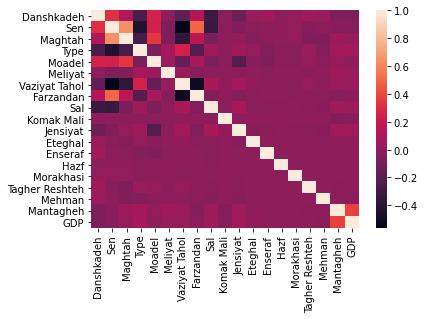

In [67]:
sns.heatmap(df_test.corr(), annot=False)

In [68]:
df_test.dropna(inplace=True)
df_test.isna().sum()

Danshkadeh        0
Sen               0
Maghtah           0
Type              0
Moadel            0
Meliyat           0
Vaziyat Tahol     0
Farzandan         0
Sal               0
Komak Mali        0
Jensiyat          0
Eteghal           0
Enseraf           0
Hazf              0
Morakhasi         0
Tagher Reshteh    0
Mehman            0
Mantagheh         0
GDP               0
dtype: int64

In [69]:
df_test.columns

Index(['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP'],
      dtype='object')

In [70]:
X = df_test.drop(['Mantagheh'], axis=1) 
y = df_test['Mantagheh']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'GDP']
(10712, 18)
(2678, 18)
(10712,)
(2678,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.6445108289768484
              precision    recall  f1-score   support

           1       0.69      0.94      0.79      1773
           2       0.00      0.00      0.00       234
           3       0.23      0.22      0.22       220
           4       0.19      0.03      0.06       185
           5       0.00      0.00      0.00       266

    accuracy                           0.64      2678
   macro avg       0.22      0.24

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Version

In [71]:
from sklearn.tree import DecisionTreeClassifier

X = df_test.drop(['Mantagheh'], axis=1) 
y = df_test['Mantagheh']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'GDP']
(10712, 18)
(2678, 18)
(10712,)
(2678,)
              precision    recall  f1-score   support

           1       0.78      0.76      0.77      1773
           2       0.14      0.16      0.15       234
           3       0.40      0.42      0.41       220
           4       0.25      0.26      0.26       185
           5       0.19      0.17      0.18       266

    accuracy                           0.59      2678
   macro avg       0.35      0.36      0.35      2678
weighted avg       0.60      0.59      0.59      2678

[[1346  167   58   61  141]
 [ 147   38   20   12   17]
 [  44   27   92   38   19]
 [  64    8   44   49   20]
 [ 132   35   15   38   46]]


Columns for training: ['Boomi', 'Sen', 'Maghtah', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Komakmali', 'Jensiyat', 'Leave', 'Remove']


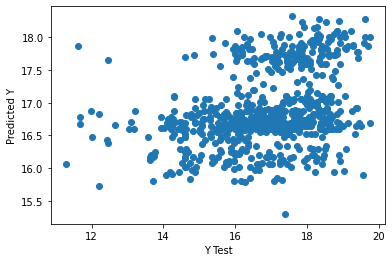

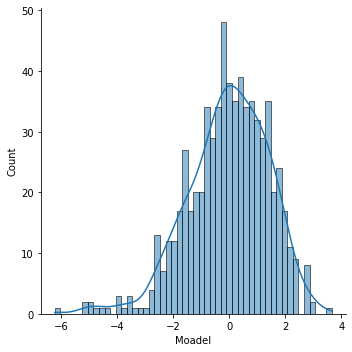

In [178]:
X = df_test.drop(['newClass', 'ID', 'Sal', 'Tasmim','Moadel'], axis=1) 
#X = df_test[['Leave', 'Remove']]
y = df_test['Moadel']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')

sns.displot((y_test-predictions),bins=50, kde=True);

In [179]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Boomi,0.140288
Sen,-1.385269
Maghtah,-1.260935
Doreh,-0.536000
Meliyat,-0.767138
Vaziyattahol,-0.023706
Farzandan,0.691198
Komakmali,0.289787
Jensiyat,0.271232
Leave,0.231680


In [180]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1246044942196982
MSE: 2.0668972105627903
RMSE: 1.4376707587493007


In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, verbose=False)

<AxesSubplot:>

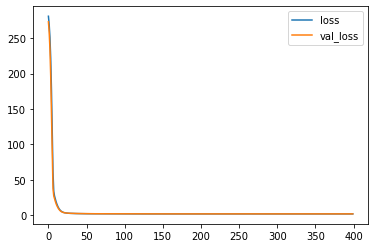

In [182]:
losses = pd.DataFrame(model.history.history)
losses.plot()

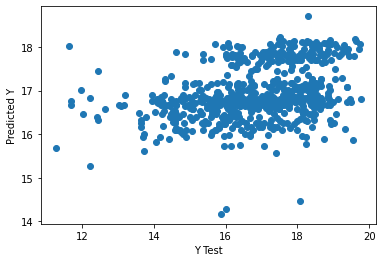

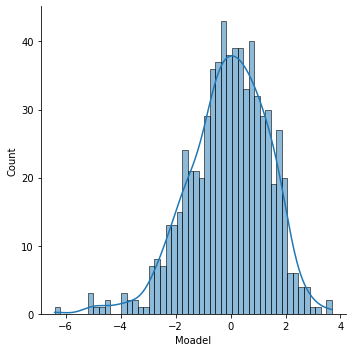

In [190]:
predictions = model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0])
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')
sns.displot((y_test-predictions),bins=50, kde=True);

<AxesSubplot:>

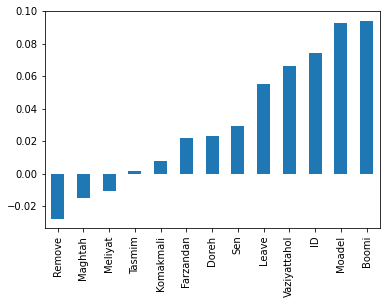

In [192]:
df_test.corr()['Jensiyat'].sort_values()[:-1].plot(kind='bar')

In [193]:
X = df_test.drop(['newClass', 'ID', 'Sal', 'Tasmim','Jensiyat'], axis=1) 
y = df_test['Jensiyat']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
preds = logmodel.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

print(logmodel.score(X_test, y_test))
print(logmodel.score(X_train, y_train))

Columns for training: ['Boomi', 'Sen', 'Maghtah', 'Moadel', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Komakmali', 'Leave', 'Remove']
(2723, 11)
(681, 11)
(2723,)
(681,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.6886930983847284
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       468
           1       0.60      0.01      0.03       213

    accuracy                           0.69       681
   macro avg       0.64      0.50      0.42       681
weighted avg       0.66      0.69      0.57       681

0.6886930983847284
0.7029012118986412


In [198]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])
#model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/300
86/86 [==============================] - 1s 3ms/step - loss: 0.8673 - accuracy: 0.7014 - val_loss: 0.6223 - val_accuracy: 0.6902
Epoch 2/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.7025 - val_loss: 0.6195 - val_accuracy: 0.6887
Epoch 3/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.7011 - val_loss: 0.6192 - val_accuracy: 0.6902
Epoch 4/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7022 - val_loss: 0.6189 - val_accuracy: 0.6916
Epoch 5/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.7018 - val_loss: 0.6181 - val_accuracy: 0.6872
Epoch 6/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.7022 - val_loss: 0.6333 - val_accuracy: 0.6902
Epoch 7/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7018 - val_loss: 0.6194 - val_accuracy: 0.6902
Epoch 8/300
8

<AxesSubplot:>

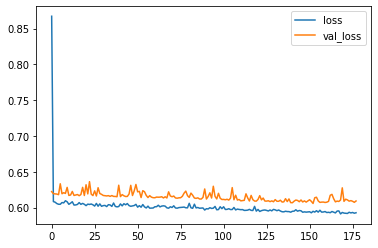

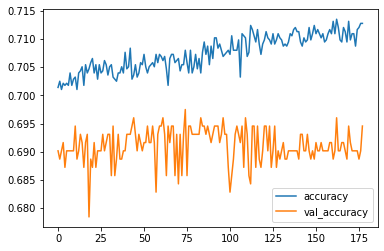

In [199]:
model_loss = pd.DataFrame(model.history.history)
loss = model_loss[['loss', 'val_loss']]
acc = model_loss[['accuracy', 'val_accuracy']]
loss.plot()
acc.plot()

In [200]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81       468
           1       0.60      0.07      0.13       213

    accuracy                           0.69       681
   macro avg       0.65      0.52      0.47       681
weighted avg       0.67      0.69      0.60       681

[[458  10]
 [198  15]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  'will be removed after 2021-01-01. '


In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       468
           1       0.40      0.39      0.40       213

    accuracy                           0.63       681
   macro avg       0.56      0.56      0.56       681
weighted avg       0.63      0.63      0.63       681

[[343 125]
 [129  84]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       468
           1       0.41      0.31      0.36       213

    accuracy                           0.65       681
   macro avg       0.57      0.56      0.56       681
weighted avg       0.62      0.65      0.63       681

[[373  95]
 [146  67]]
